#    Wine quality prediction

# problem statement:
    predicting the quality of the wine:
    
     >good quality 
     
     >poor quality

# dataset:
the dataset was obtained from kaggle with the following input  variables and output variable

    Input variables/independent variables/features
    
1 - fixed acidity=most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity=the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid=found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar=the amount of sugar remaining after fermentation stops

5 - chlorides=the amount of salt in the wine

6 - free sulfur dioxide=the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion

7 - total sulfur dioxide=amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine

8 - density=the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH=describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14

10 - sulphates=a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial

11 - alcohol=amount of alcohol in wine

   Output variable (based on sensory data)/dependent variable/target variable
   
12 - quality (score between 0 and 10)

# dependent  variable/output
The dependent variable, also known as the target variable, is the variable that the model aims 
to predict or estimate based on the independent variables.

# independent variables/input
an independent variables also known as features are  the  variables that are used as an input or predictor to the model

# tool/libraries  for building the model
pandas for loading  the data an for data analysis

numpy(numerical python) for numerical operations

matplotlib/seaborn used in data visualization

standardscaler for feature engineering

train_test_split for splitting the data

metrics for model evaluation

sklearn/scikit learn

# importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


# loading the dataset

In [2]:
df=pd.read_csv("winequality-red.csv")
#getting the first five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#getting the last five rows
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# data exploration:
it is the intial stage, It focuses on understanding the characteristics and properties of the data before 
formal analysis takes place, this may  nvolve techniques such as data visualization, summary statistics, 
and basic data manipulation.

In [4]:
#getting the shape of the data
df.shape

(1599, 12)

In [5]:
#getting the column names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# checking for null values

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# checking for the duplicates

In [7]:
df.duplicated().sum()

240

# getting the summary of the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# getting the statistical summary

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# data cleaning

In [10]:
#removing the duplicates
#(inplace = True) will make sure that the method does NOT return a new DataFrame, but it will remove all duplicates from the original DataFrame.
df.drop_duplicates(inplace=True)

In [11]:
#checking if the duplicates have been removed
df.duplicated().sum()

0

In [12]:
#value_counts method show the count for each class
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [13]:
#the unique unction shows the classes
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [14]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.171231,0.578596,0.244523,2.509532,0.093971,17.161179,57.406412,0.997082,3.300815,0.623570,9.888562
6,8.337383,0.496084,0.279364,2.457290,0.085075,15.637383,40.816822,0.996565,3.318000,0.674542,10.658879
7,8.858683,0.403653,0.371856,2.716766,0.076832,13.994012,35.449102,0.996051,3.290060,0.742635,11.491118
8,8.441176,0.427647,0.382941,2.576471,0.068353,13.764706,34.470588,0.995095,3.274118,0.774706,12.158824


# data visualization

In [15]:
import warnings 
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

<AxesSubplot:xlabel='quality', ylabel='count'>

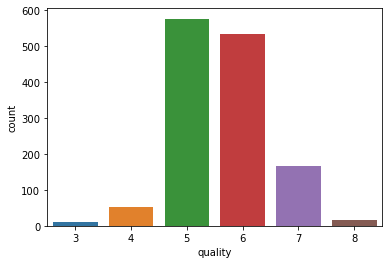

In [16]:
#quality distribution
sns.countplot(df['quality'])

<function matplotlib.pyplot.show(close=None, block=None)>

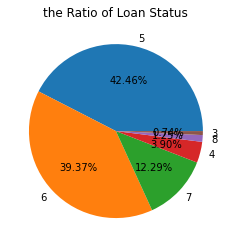

In [17]:
plt.pie(x = df['quality'].value_counts() ,autopct='%1.2f%%' ,labels=df['quality'].value_counts().index)
plt.title('the Ratio of Loan Status')
plt.show

<AxesSubplot:>

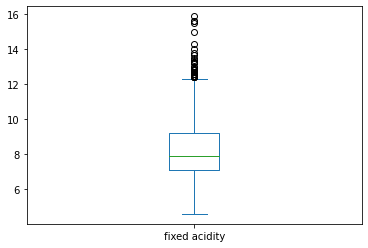

In [18]:
#distribution of fixed acidity
#boxplot help us get the Average,minimum amd the maximu value and also the upper,lower limit and even outliers
df["fixed acidity"].plot(kind="box")

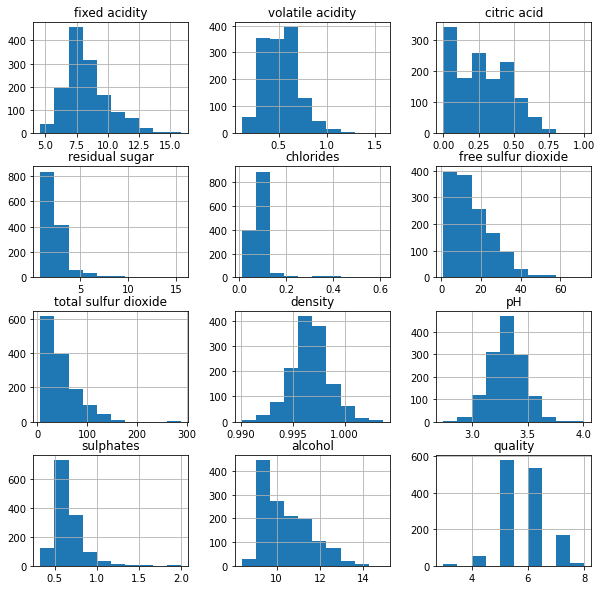

In [19]:
#histogram  for all the collumns
df.hist(figsize=(10,10),bins=10)
plt.show()


# feature engineering
This involves feature transformation such us feature extraction,feature selection,etc

In [37]:

df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [38]:
df["goodquality"]=[1 if x>=7 else 0 for x in df["quality"]]
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0


# seperating the dataset
that is seperating the dependent an dindependent variables

In [101]:
x=df.drop(["quality","goodquality"],axis=1)
y=df["goodquality"]

In [102]:
df["goodquality"].value_counts()

0    1175
1     184
Name: goodquality, dtype: int64

In [103]:
#columns in x represent the features/independent variables
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [104]:
#columns in y represent the target variable/dependent variable
y.head()

0    0
1    0
2    0
3    0
5    0
Name: goodquality, dtype: int64

# splitting the dataset

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Standardizing the training data

In [106]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

# Building the model

# KNN

In [107]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can choose the number of neighbors (K) here
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [108]:
predict=knn_classifier.predict(x_test)

In [109]:
print(accuracy_score(y_test,predict)*100)

85.66176470588235


# Logistic regression

In [110]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [111]:
#evaluating the performance model
pred=lr.predict(x_test)

In [112]:
print(accuracy_score(y_test,pred)*100)

86.02941176470588


In [118]:
confusion_matrix(y_test,pred)

array([[225,   6],
       [ 32,   9]], dtype=int64)

# Random forest

In [113]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [114]:
#evaluating the performance model
predicting=rf.predict(x_test)

In [115]:
print(accuracy_score(y_test,predicting)*100)

88.97058823529412


In [117]:
confusion_matrix(y_test,predicting)

array([[227,   4],
       [ 26,  15]], dtype=int64)

# Building a predictive model

In [116]:
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,)
#changing input data into numpy array
convert=np.asarray(input_data)
#reshaping data as we are predicting the label for one instance
reshaping=convert.reshape(1,-1)
prediction=rf.predict(reshaping)
print(prediction)
if(prediction[0]==1):
    print("good quality wine")
else:
    print("poor quality wine")

[1]
good quality wine
